In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bus_3 = pd.read_csv('../20250210/arrival_records_3_normal_d0.csv')
bus_3_g = pd.read_csv('../20250210/arrival_records_3_d0_grandprix.csv')
bus_15 = pd.read_csv('../20250210/arrival_records_15_normal.csv')
bus_15_g = pd.read_csv('../20250210/arrival_records_15_grandprix.csv')
bus_26 = pd.read_csv('../20250210/arrival_records_26_normal.csv')
bus_26_g = pd.read_csv('../20250210/arrival_records_26_grandprix.csv')
bus_73 = pd.read_csv('../20250210/arrival_records_73_normal.csv')
bus_73_g = pd.read_csv('../20250210/arrival_records_73_grandprix.csv')
bus_AP1 = pd.read_csv('../20250210/arrival_records_AP1_normal.csv')
bus_AP1_g = pd.read_csv('../20250210/arrival_records_AP1_grandprix.csv')

In [3]:
bus_AP1[(bus_AP1['passbyNum'] == 12) | (bus_AP1['passbyNum'] == -12)]['startStation'].value_counts()

startStation
M239/1    1709
M254      1688
Name: count, dtype: int64

In [4]:
bus_AP1_g[(bus_AP1_g['passbyNum'] == 12) | (bus_AP1_g['passbyNum'] == -12)]['startStation'].value_counts()

startStation
M239/1    490
M254      479
Name: count, dtype: int64

In [5]:
bus_3.columns

Index(['startStation', 'endStation', 'date', 'time', 'weekday',
       'passengerFlow', 'trafficCondition', 'busPlate', 'passbyNum',
       'arrivalDuration'],
      dtype='object')

In [6]:
dn = ['2024/11/14', '2024/11/15', '2024/11/16', '2024/11/17', '11/14/2024', '11/15/2024', '11/16/2024', '11/17/2024']
bus_3_g = bus_3_g[bus_3_g['date'].isin(dn)]
bus_15_g = bus_15_g[bus_15_g['date'].isin(dn)]
bus_26_g = bus_26_g[bus_26_g['date'].isin(dn)]
bus_73_g = bus_73_g[bus_73_g['date'].isin(dn)]
bus_AP1_g = bus_AP1_g[bus_AP1_g['date'].isin(dn)]

In [7]:
bus_3, bus_3_g = bus_3.drop(columns='date'), bus_3_g.drop(columns='date')
bus_15, bus_15_g = bus_15.drop(columns='date'), bus_15_g.drop(columns='date')
bus_26, bus_26_g = bus_26.drop(columns='date'), bus_26_g.drop(columns='date')
bus_73, bus_73_g = bus_73.drop(columns='date'), bus_73_g.drop(columns='date')
bus_AP1, bus_AP1_g = bus_AP1.drop(columns='date'), bus_AP1_g.drop(columns='date')

In [8]:
# col = ['time', 'weekday', 'passengerFlow', 'trafficCondition', 'passbyNum', 'arrivalDuration']
# bus_3, bus_3_g = bus_3[col], bus_3_g[col]
# bus_15, bus_15_g = bus_15[col], bus_15_g[col]
# bus_26, bus_26_g = bus_26[col], bus_26_g[col]
# bus_73, bus_73_g = bus_73[col], bus_73_g[col]
# bus_AP1, bus_AP1_g = bus_AP1[col], bus_AP1_g[col]
bus_3['route'], bus_3_g['route'] = 3, 3
bus_15['route'], bus_15_g['route'] = 15, 15
bus_26['route'], bus_26_g['route'] = 26, 26
bus_73['route'], bus_73_g['route'] = 73, 73
bus_AP1['route'], bus_AP1_g['route'] = 'AP1', 'AP1'

In [9]:
bus_3

,startStation,endStation,time,weekday,passengerFlow,trafficCondition,busPlate,passbyNum,arrivalDuration,route
0,M1/9,M7/1,12:15:05,2,-1,-1,MX1601,0,137,3
1,M161,M70,12:15:29,2,-1,-1,MX2215,0,47,3
2,M161,M70,12:15:46,2,2,-1,MX2108,0,40,3
3,M135/2,M170/2,12:16:14,2,-1,-1,AA3137,0,92,3
4,M70,M118,12:16:25,2,-1,-1,MX2215,0,24,3
...,...,...,...,...,...,...,...,...,...,...
36938,M125,M135/2,12:09:17,2,-1,2,MX2215,0,189,3
36939,M158/2,M161,12:09:17,2,-1,-1,MX2239,0,97,3
36940,M112,M127,12:09:41,2,2,2,MX2037,0,89,3
36941,M161,M70,12:10:08,2,-1,-1,MX2239,0,13,3


In [10]:
bus_3['hour'], bus_3_g['hour'] = pd.to_datetime(bus_3['time']).dt.hour, pd.to_datetime(bus_3_g['time']).dt.hour
bus_15['hour'], bus_15_g['hour'] = pd.to_datetime(bus_15['time']).dt.hour, pd.to_datetime(bus_15_g['time']).dt.hour
bus_26['hour'], bus_26_g['hour'] = pd.to_datetime(bus_26['time']).dt.hour, pd.to_datetime(bus_26_g['time']).dt.hour
bus_73['hour'], bus_73_g['hour'] = pd.to_datetime(bus_73['time']).dt.hour, pd.to_datetime(bus_73_g['time']).dt.hour
bus_AP1['hour'], bus_AP1_g['hour'] = pd.to_datetime(bus_AP1['time']).dt.hour, pd.to_datetime(bus_AP1_g['time']).dt.hour
# bus_3.sort_values(by=['hour'], inplace=True)
# bus_3_g.sort_values(by=['hour'], inplace=True)
# bus_15.sort_values(by=['hour'], inplace=True)
# bus_15_g.sort_values(by=['hour'], inplace=True)
# bus_26.sort_values(by=['hour'], inplace=True)
# bus_26_g.sort_values(by=['hour'], inplace=True)
# bus_73.sort_values(by=['hour'], inplace=True)
# bus_73_g.sort_values(by=['hour'], inplace=True)
# bus_AP1.sort_values(by=['hour'], inplace=True)
# bus_AP1_g.sort_values(by=['hour'], inplace=True)

C:\Users\gennw\AppData\Local\Temp\ipykernel_20212\1630609518.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bus_3['hour'], bus_3_g['hour'] = pd.to_datetime(bus_3['time']).dt.hour, pd.to_datetime(bus_3_g['time']).dt.hour
C:\Users\gennw\AppData\Local\Temp\ipykernel_20212\1630609518.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bus_3['hour'], bus_3_g['hour'] = pd.to_datetime(bus_3['time']).dt.hour, pd.to_datetime(bus_3_g['time']).dt.hour
C:\Users\gennw\AppData\Local\Temp\ipykernel_20212\1630609518.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bus_15['hour'], b

In [11]:
bus_3_re1, bus_3_g_re1 = bus_3[bus_3['passbyNum'] == 0], bus_3_g[bus_3_g['passbyNum'] == 0]
bus_15_re1, bus_15_g_re1 = bus_15[bus_15['passbyNum'] == 0], bus_15_g[bus_15_g['passbyNum'] == 0]
bus_26_re1, bus_26_g_re1 = bus_26[bus_26['passbyNum'] == 0], bus_26_g[bus_26_g['passbyNum'] == 0]
bus_73_re1, bus_73_g_re1 = bus_73[bus_73['passbyNum'] == 0], bus_73_g[bus_73_g['passbyNum'] == 0]
bus_AP1_re1 = bus_AP1[(bus_AP1['passbyNum'] == 0) | (bus_AP1['passbyNum'] == -12) | (bus_AP1['passbyNum'] == 12)]
bus_AP1_g_re1 = bus_AP1_g[(bus_AP1_g['passbyNum'] == 0) | (bus_AP1_g['passbyNum'] == -12) | (bus_AP1_g['passbyNum'] == 12)]

In [12]:
bus_3_re2 = bus_3_re1[(bus_3_re1['arrivalDuration'] <= bus_3_re1['arrivalDuration'].mean() + 3 * bus_3_re1['arrivalDuration'].std()) & (bus_3_re1['arrivalDuration'] >= bus_3_re1['arrivalDuration'].mean() - 3 * bus_3_re1['arrivalDuration'].std())]
bus_3_g_re2 = bus_3_g_re1[(bus_3_g_re1['arrivalDuration'] <= bus_3_g_re1['arrivalDuration'].mean() + 3 * bus_3_g_re1['arrivalDuration'].std()) & (bus_3_g_re1['arrivalDuration'] >= bus_3_g_re1['arrivalDuration'].mean() - 3 * bus_3_g_re1['arrivalDuration'].std())]
bus_15_re2 = bus_15_re1[(bus_15_re1['arrivalDuration'] <= bus_15_re1['arrivalDuration'].mean() + 3 * bus_15_re1['arrivalDuration'].std()) & (bus_15_re1['arrivalDuration'] >= bus_15_re1['arrivalDuration'].mean() - 3 * bus_15_re1['arrivalDuration'].std())]
bus_15_g_re2 = bus_15_g_re1[(bus_15_g_re1['arrivalDuration'] <= bus_15_g_re1['arrivalDuration'].mean() + 3 * bus_15_g_re1['arrivalDuration'].std()) & (bus_15_g_re1['arrivalDuration'] >= bus_15_g_re1['arrivalDuration'].mean() - 3 * bus_15_g_re1['arrivalDuration'].std())]
bus_26_re2 = bus_26_re1[(bus_26_re1['arrivalDuration'] <= bus_26_re1['arrivalDuration'].mean() + 3 * bus_26_re1['arrivalDuration'].std()) & (bus_26_re1['arrivalDuration'] >= bus_26_re1['arrivalDuration'].mean() - 3 * bus_26_re1['arrivalDuration'].std())]
bus_26_g_re2 = bus_26_g_re1[(bus_26_g_re1['arrivalDuration'] <= bus_26_g_re1['arrivalDuration'].mean() + 3 * bus_26_g_re1['arrivalDuration'].std()) & (bus_26_g_re1['arrivalDuration'] >= bus_26_g_re1['arrivalDuration'].mean() - 3 * bus_26_g_re1['arrivalDuration'].std())]
bus_73_re2 = bus_73_re1[(bus_73_re1['arrivalDuration'] <= bus_73_re1['arrivalDuration'].mean() + 3 * bus_73_re1['arrivalDuration'].std()) & (bus_73_re1['arrivalDuration'] >= bus_73_re1['arrivalDuration'].mean() - 3 * bus_73_re1['arrivalDuration'].std())]
bus_73_g_re2 = bus_73_g_re1[(bus_73_g_re1['arrivalDuration'] <= bus_73_g_re1['arrivalDuration'].mean() + 3 * bus_73_g_re1['arrivalDuration'].std()) & (bus_73_g_re1['arrivalDuration'] >= bus_73_g_re1['arrivalDuration'].mean() - 3 * bus_73_g_re1['arrivalDuration'].std())]
bus_AP1_re2 = bus_AP1_re1[(bus_AP1_re1['arrivalDuration'] <= bus_AP1_re1['arrivalDuration'].mean() + 3 * bus_AP1_re1['arrivalDuration'].std()) & (bus_AP1_re1['arrivalDuration'] >= bus_AP1_re1['arrivalDuration'].mean() - 3 * bus_AP1_re1['arrivalDuration'].std())]
bus_AP1_g_re2 = bus_AP1_g_re1[(bus_AP1_g_re1['arrivalDuration'] <= bus_AP1_g_re1['arrivalDuration'].mean() + 3 * bus_AP1_g_re1['arrivalDuration'].std()) & (bus_AP1_g_re1['arrivalDuration'] >= bus_AP1_g_re1['arrivalDuration'].mean() - 3 * bus_AP1_g_re1['arrivalDuration'].std())]

In [13]:
bus_3_g_re2 = bus_3_g_re2[(bus_3_g_re2['startStation'] != 'M70') & (bus_3_g_re2['startStation'] != 'M118')]
bus_AP1_g_re2 = bus_AP1_g_re2[(bus_AP1_g_re2['startStation'] != 'M50') & (bus_AP1_g_re2['startStation'] != 'M239/2') & (bus_AP1_g_re2['startStation'] != 'T343') & (bus_AP1_g_re2['startStation'] != 'M239/1')]

In [14]:
print(f"Bus 3: Normal: {bus_3.shape[0]} -> {bus_3_re1.shape[0]} ({round(bus_3_re1.shape[0] / bus_3.shape[0], 4)}) -> {bus_3_re2.shape[0]} ({round(bus_3_re2.shape[0] / bus_3.shape[0], 4)}), Grandprix: {bus_3_g.shape[0]} -> {bus_3_g_re1.shape[0]} ({round(bus_3_g_re1.shape[0] / bus_3_g.shape[0], 4)}) -> {bus_3_g_re2.shape[0]} ({round(bus_3_g_re2.shape[0] / bus_3_g.shape[0], 4)})")
print(f"Bus 15: Normal: {bus_15.shape[0]} -> {bus_15_re1.shape[0]} ({round(bus_15_re1.shape[0] / bus_15.shape[0], 4)}) -> {bus_15_re2.shape[0]} ({round(bus_15_re2.shape[0] / bus_15.shape[0], 4)}), Grandprix: {bus_15_g.shape[0]} -> {bus_15_g_re1.shape[0]} ({round(bus_15_g_re1.shape[0] / bus_15_g.shape[0], 4)}) -> {bus_15_g_re2.shape[0]} ({round(bus_15_g_re2.shape[0] / bus_15_g.shape[0], 4)})")
print(f"Bus 26: Normal: {bus_26.shape[0]} -> {bus_26_re1.shape[0]} ({round(bus_26_re1.shape[0] / bus_26.shape[0], 4)}) -> {bus_26_re2.shape[0]} ({round(bus_26_re2.shape[0] / bus_26.shape[0], 4)}), Grandprix: {bus_26_g.shape[0]} -> {bus_26_g_re1.shape[0]} ({round(bus_26_g_re1.shape[0] / bus_26_g.shape[0], 4)}) -> {bus_26_g_re2.shape[0]} ({round(bus_26_g_re2.shape[0] / bus_26_g.shape[0], 4)})")
print(f"Bus 73: Normal: {bus_73.shape[0]} -> {bus_73_re1.shape[0]} ({round(bus_73_re1.shape[0] / bus_73.shape[0], 4)}) -> {bus_73_re2.shape[0]} ({round(bus_73_re2.shape[0] / bus_73.shape[0], 4)}), Grandprix: {bus_73_g.shape[0]} -> {bus_73_g_re1.shape[0]} ({round(bus_73_g_re1.shape[0] / bus_73_g.shape[0], 4)}) -> {bus_73_g_re2.shape[0]} ({round(bus_73_g_re2.shape[0] / bus_73_g.shape[0], 4)})")
print(f"Bus AP1: Normal: {bus_AP1.shape[0]} -> {bus_AP1_re1.shape[0]} ({round(bus_AP1_re1.shape[0] / bus_AP1.shape[0], 4)}) -> {bus_AP1_re2.shape[0]} ({round(bus_AP1_re2.shape[0] / bus_AP1.shape[0], 4)}), Grandprix: {bus_AP1_g.shape[0]} -> {bus_AP1_g_re1.shape[0]} ({round(bus_AP1_g_re1.shape[0] / bus_AP1_g.shape[0], 4)}) -> {bus_AP1_g_re2.shape[0]} ({round(bus_AP1_g_re2.shape[0] / bus_AP1_g.shape[0], 4)})")

Bus 3: Normal: 36943 -> 36366 (0.9844) -> 36094 (0.977), Grandprix: 7683 -> 6663 (0.8672) -> 6009 (0.7821)
Bus 15: Normal: 22887 -> 22233 (0.9714) -> 21761 (0.9508), Grandprix: 4427 -> 4291 (0.9693) -> 4194 (0.9474)
Bus 26: Normal: 56300 -> 54416 (0.9665) -> 54382 (0.9659), Grandprix: 16383 -> 15863 (0.9683) -> 15677 (0.9569)
Bus 73: Normal: 36655 -> 34785 (0.949) -> 34385 (0.9381), Grandprix: 7860 -> 6881 (0.8754) -> 6716 (0.8545)
Bus AP1: Normal: 35484 -> 32787 (0.924) -> 32568 (0.9178), Grandprix: 7734 -> 6519 (0.8429) -> 5759 (0.7446)


In [15]:
bus_3_re2

,startStation,endStation,time,weekday,passengerFlow,trafficCondition,busPlate,passbyNum,arrivalDuration,route,hour
0,M1/9,M7/1,12:15:05,2,-1,-1,MX1601,0,137,3,12
1,M161,M70,12:15:29,2,-1,-1,MX2215,0,47,3,12
2,M161,M70,12:15:46,2,2,-1,MX2108,0,40,3,12
3,M135/2,M170/2,12:16:14,2,-1,-1,AA3137,0,92,3,12
4,M70,M118,12:16:25,2,-1,-1,MX2215,0,24,3,12
...,...,...,...,...,...,...,...,...,...,...,...
36938,M125,M135/2,12:09:17,2,-1,2,MX2215,0,189,3,12
36939,M158/2,M161,12:09:17,2,-1,-1,MX2239,0,97,3,12
36940,M112,M127,12:09:41,2,2,2,MX2037,0,89,3,12
36941,M161,M70,12:10:08,2,-1,-1,MX2239,0,13,3,12


In [ ]:
# col_re = ['startStation', 'endStation', 'time', 'weekday', 'passengerFlow', 'trafficCondition', 'busPlate', 'arrivalDuration']
# bus_3_re2, bus_3_g_re2 = bus_3_re2[col_re].reset_index(drop=True), bus_3_g_re2[col_re].reset_index(drop=True)
# bus_15_re2, bus_15_g_re2 = bus_15_re2[col_re].reset_index(drop=True), bus_15_g_re2[col_re].reset_index(drop=True)
# bus_26_re2, bus_26_g_re2 = bus_26_re2[col_re].reset_index(drop=True), bus_26_g_re2[col_re].reset_index(drop=True)
# bus_73_re2, bus_73_g_re2 = bus_73_re2[col_re].reset_index(drop=True), bus_73_g_re2[col_re].reset_index(drop=True)
# bus_AP1_re2, bus_AP1_g_re2 = bus_AP1_re2[col_re].reset_index(drop=True), bus_AP1_g_re2[col_re].reset_index(drop=True)
# bus_3_re2.to_csv('arrival_records_3_d0_normal_re2.csv', index=False)
# bus_3_g_re2.to_csv('arrival_records_3_d0_grandprix_re2.csv', index=False)
# bus_15_re2.to_csv('arrival_records_15_normal_re2.csv', index=False)
# bus_15_g_re2.to_csv('arrival_records_15_grandprix_re2.csv', index=False)
# bus_26_re2.to_csv('arrival_records_26_normal_re2.csv', index=False)
# bus_26_g_re2.to_csv('arrival_records_26_grandprix_re2.csv', index=False)
# bus_73_re2.to_csv('arrival_records_73_normal_re2.csv', index=False)
# bus_73_g_re2.to_csv('arrival_records_73_grandprix_re2.csv', index=False)
# bus_AP1_re2.to_csv('arrival_records_AP1_normal_re2.csv', index=False)
# bus_AP1_g_re2.to_csv('arrival_records_AP1_grandprix_re2.csv', index=False)

In [16]:
bus_normal = pd.concat([bus_3_re2, bus_15_re2, bus_26_re2, bus_73_re2, bus_AP1_re2], axis=0).reset_index(drop=True)
bus_grandprix = pd.concat([bus_3_g_re2, bus_15_g_re2, bus_26_g_re2, bus_73_g_re2, bus_AP1_g_re2], axis=0).reset_index(drop=True)
# col_re = ['route', 'startStation', 'endStation', 'time', 'weekday', 'passengerFlow', 'trafficCondition', 'busPlate', 'arrivalDuration']
# bus_normal.to_csv('arrival_records_merge_normal_re2.csv', index=False)
# bus_grandprix.to_csv('arrival_records_merge_grandprix_re2.csv', index=False)

In [17]:
bus_normal

,startStation,endStation,time,weekday,passengerFlow,trafficCondition,busPlate,passbyNum,arrivalDuration,route,hour
0,M1/9,M7/1,12:15:05,2,-1,-1,MX1601,0,137,3,12
1,M161,M70,12:15:29,2,-1,-1,MX2215,0,47,3,12
2,M161,M70,12:15:46,2,2,-1,MX2108,0,40,3,12
3,M135/2,M170/2,12:16:14,2,-1,-1,AA3137,0,92,3,12
4,M70,M118,12:16:25,2,-1,-1,MX2215,0,24,3,12
...,...,...,...,...,...,...,...,...,...,...,...
179185,T344,T356/2,11:51:39,0,-1,1,AA7336,0,16,AP1,11
179186,T408/6,T343,11:51:46,0,-1,1,AA7730,0,109,AP1,11
179187,M239/2,M254,11:52:10,0,-1,1,AA6719,0,46,AP1,11
179188,T343,M239/1,11:52:10,0,-1,1,AA7793,0,401,AP1,11


In [18]:
violin_cols = ['hour', 'weekday', 'passengerFlow', 'trafficCondition', 'arrivalDuration']
violin_cols

['hour', 'weekday', 'passengerFlow', 'trafficCondition', 'arrivalDuration']

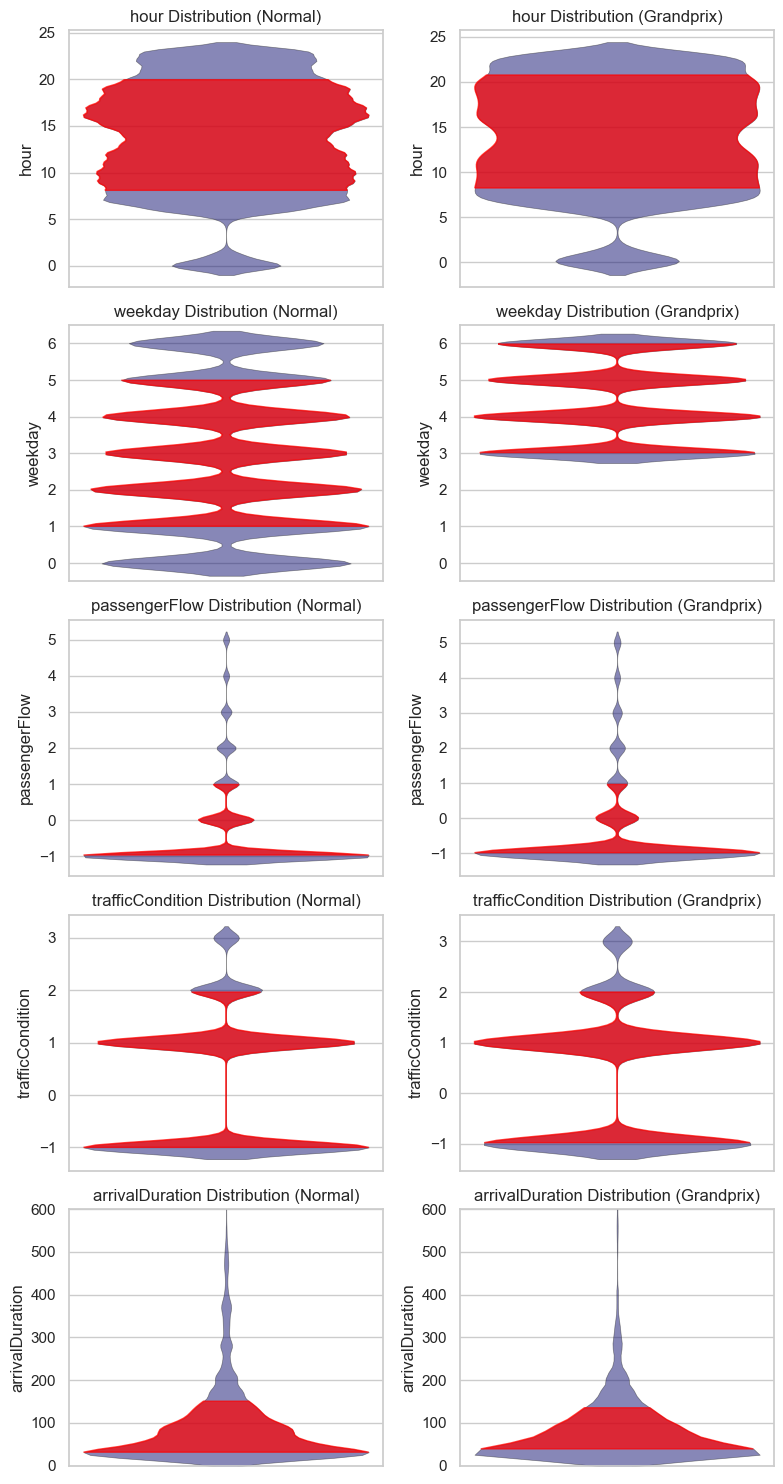

In [23]:
sns.set(style="whitegrid")
def custom_violinplot(ax, data, title, feature):
    parts = sns.violinplot(y=data[feature], ax=ax, inner=None, color='navy', linewidth=0.5, alpha=0.5)
    
    q1 = np.percentile(data[feature], 15)
    q3 = np.percentile(data[feature], 85)
    
    for pc in parts.collections:
        paths = pc.get_paths()
        for path in paths:
            vertices = path.vertices
            ys = vertices[:, 1]
            xs = vertices[:, 0]
            
            mask = (ys >= q1) & (ys <= q3)
            ax.fill(xs[mask], ys[mask], color='red', alpha=0.7)
    if feature == 'arrivalDuration':
        ax.set_ylim(0, 600)
    if feature == 'weekday':
        ax.set_ylim(-0.5, 6.5)
    ax.set_title(title)
    ax.set_ylabel(feature)

fig, axes = plt.subplots(5, 2, figsize=(8, 15))
axes = axes.flatten()

for idx in range(5):
    custom_violinplot(
        ax=axes[idx * 2],
        data=bus_normal,
        title=f'{violin_cols[idx]} Distribution (Normal)',
        feature=violin_cols[idx]
    )
    custom_violinplot(
        ax=axes[idx * 2 + 1],
        data=bus_grandprix,
        title=f'{violin_cols[idx]} Distribution (Grandprix)',
        feature=violin_cols[idx]
    )

plt.tight_layout()
plt.show()